## Imports

In [16]:
import neurokit2 as nk
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

## Simulate ECG data

In [2]:
ecg100 = nk.ecg_simulate(duration=10, noise=0.01, heart_rate=100)
ecg_df = pd.DataFrame({"ECG_100": ecg100})

In [3]:
train_data, test_data = train_test_split(ecg_df, test_size=0.2, random_state=42)

In [4]:
input_layer = Input(shape=(1,))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(1, activation='sigmoid')(encoded)

In [5]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [6]:
autoencoder.fit(train_data["ECG_100"], train_data["ECG_100"], epochs=50, batch_size=32, shuffle=True, validation_data=(test_data["ECG_100"], test_data["ECG_100"]))


Epoch 1/50

250/250 [==============================] - 1s 2ms/step - loss: 0.0622 - val_loss: 0.0114
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0086
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0077
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.006

In [7]:
embedding_model = Model(inputs=input_layer, outputs=encoded)

In [8]:
embeddings = embedding_model.predict(test_data["ECG_100"])

63/63 [==============================] - 0s 991us/step


In [20]:
tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = tsne.fit_transform(embeddings)

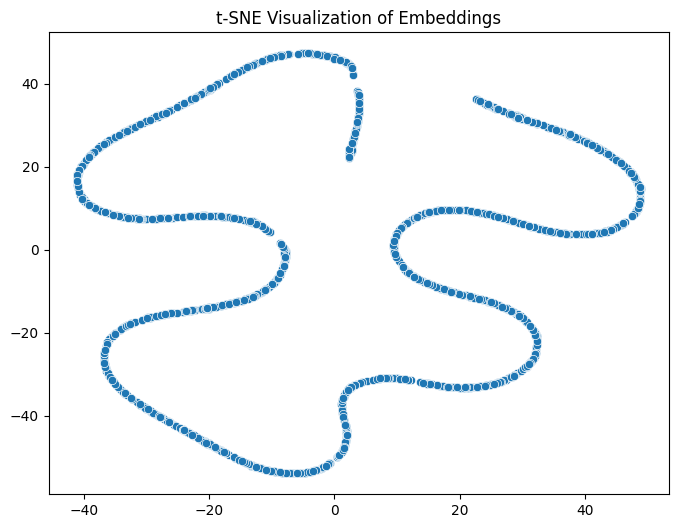

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedding_tsne[:, 0], y=embedding_tsne[:, 1])
plt.title('t-SNE Visualization of Embeddings')
plt.show()